In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
getdata = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
dataframe = getdata[1].loc[3:]
dataframe.columns = ["Country", "Year_1990", "Year_2005", "Year_2017", "2017_%_of_world","2017_vs_1990_change_in_%", "2017_per_land_area", "2017_per_capita", "2018_Total_Including_LUCF", "2018_Total_Excluding_LUCF"]

In [28]:
topfivedf = dataframe.iloc[: , : 4]
topfivedf = topfivedf.sort_values(by=["Year_2017"], ascending= False)
topfivedf = topfivedf.iloc[0:5]

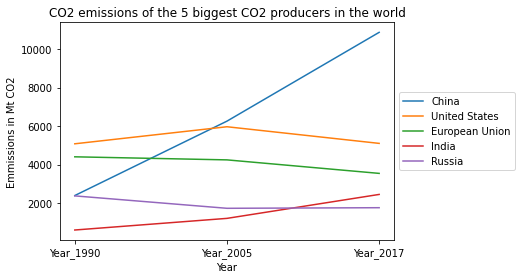

In [30]:
fig, ax = plt.subplots()

years = topfivedf.columns[1:]

for index, row in topfivedf.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("CO2 emissions of the 5 biggest CO2 producers in the world")
plt.xlabel("Year")
plt.ylabel("Emmissions in Mt CO2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [39]:
countriesdf = dataframe.iloc[:, :4]
countriesdf["Change in percentages"] = countriesdf.loc[: , "Year_2017"]/ countriesdf.loc[: , "Year_1990"] * 100
countriesdf = countriesdf.sort_values(by=["Change in percentages"], ascending= False)

top3 = countriesdf.head(3)
top3 = top3.append(countriesdf.tail(3))

In [55]:
#top3 = top3.drop(columns=["Change in percentages"])

top3["1990"]  = 100
all1990 = top3.loc[:, "Year_1990"]
all2005 = top3.loc[:, "Year_2005"]
all2017 = top3.loc[:, "Year_2017"]
top3["2005"] = all2005 / all1990 * 100
top3["2017"] = all2017 / all1990 * 100

finaldataframe = top3.loc[:, ["Country","1990", "2005", "2017"]]

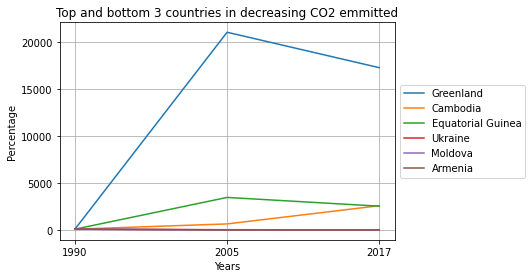

In [57]:
fig, ax = plt.subplots()

years = finaldataframe.columns[1:]
for index, row in finaldataframe.iterrows():
  plt.plot(years, row[1:], label=row[0])

plt.title("Top and bottom 3 countries in decreasing CO2 emmitted")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()

In [62]:
atleast5mtdf = dataframe.loc[(dataframe.Year_1990 > 5)]

atleast5mtdf = atleast5mtdf.iloc[:, :4]
atleast5mtdf["Change in percentages"] = atleast5mtdf.loc[: , "Year_2017"]/ atleast5mtdf.loc[: , "Year_1990"] * 100
atleast5mtdf = atleast5mtdf.sort_values(by=["Change in percentages"], ascending= False)

top3atleast5df = atleast5mtdf.head(3)
top3atleast5df = top3atleast5df.append(atleast5mtdf.tail(3))


In [66]:
top3atleast5df["1990"]  = 100
all1990 = top3atleast5df.loc[:, "Year_1990"]
all2005 = top3atleast5df.loc[:, "Year_2005"]
all2017 = top3atleast5df.loc[:, "Year_2017"]
top3atleast5df["2005"] = all2005 / all1990 * 100
top3atleast5df["2017"] = all2017 / all1990 * 100

top3atleast5df = top3atleast5df.iloc[:, [0, 5, 6, 7]]


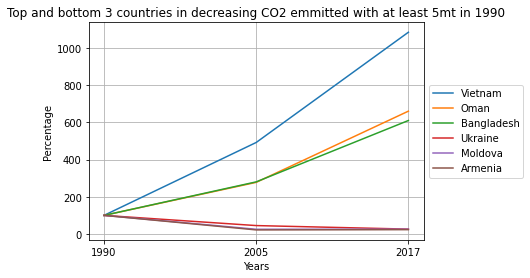

In [68]:
fig, ax = plt.subplots()

years2 = top3atleast5df.columns[1:]
for index, row in top3atleast5df.iterrows():
  plt.plot(years2, row[1:], label=row[0])

plt.title("Top and bottom 3 countries in decreasing CO2 emmitted with at least 5mt in 1990")
plt.xlabel("Years")
plt.ylabel("Percentage")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.grid()
plt.show()